## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [30]:
df = pd.read_csv("QueryResults.csv")

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [31]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [32]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [33]:
# rename the columns 
new_column_names = {'m':'Date','TagName':'Programming Language','Unnamed: 2':'Number of Posts'}
df.rename(columns=new_column_names,inplace=True)

In [34]:
column_counts = {} # create a dictionary 
for column in df.columns:
  column_counts[column]=(df[column].count())

In [35]:
column_counts

{'Date': 1991, 'Programming Language': 1991, 'Number of Posts': 1991}

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [36]:
language_posts = df.groupby('Programming Language')['Number of Posts'].sum().reset_index(name='Total Posts')

In [37]:
language_posts

,Programming Language,Total Posts
0,assembly,34852
1,c,336042
2,c#,1423530
3,c++,684210
4,delphi,46212
5,go,47499
6,java,1696403
7,javascript,2056510
8,perl,65286
9,php,1361988


In [38]:
most_index = language_posts['Total Posts'].idxmax()
most_posts_language = language_posts['Programming Language'][most_index]
most_posts_language

'javascript'

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [39]:
df['Date'] = pd.to_datetime(df['Date'])

In [40]:
df['Month']=df['Date'].dt.strftime('%Y-%m')

In [42]:
language_month_counts = df.groupby('Programming Language')['Month'].nunique().reset_index(name='Unique Months')

In [43]:
language_month_counts

,Programming Language,Unique Months
0,assembly,144
1,c,144
2,c#,145
3,c++,144
4,delphi,144
5,go,129
6,java,144
7,javascript,144
8,perl,144
9,php,144


In [49]:
fewest_months_language = language_month_counts.loc[language_month_counts['Unique Months'].idxmin(),'Programming Language']
fewest_months = language_month_counts.loc[language_month_counts['Unique Months'].idxmin(),'Unique Months']


In [52]:
print(f"The language with fewest months is {fewest_months_language}; It lasts for {fewest_months} months.")

The language with fewest months is go; It lasts for 129 months.


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
df

,Date,Programming Language,Number of Posts,Month
0,2008-07-01,c#,3,2008-07
1,2008-08-01,assembly,8,2008-08
2,2008-08-01,javascript,162,2008-08
3,2008-08-01,c,85,2008-08
4,2008-08-01,python,124,2008-08
...,...,...,...,...
1986,2020-07-01,r,5694,2020-07
1987,2020-07-01,go,743,2020-07
1988,2020-07-01,ruby,775,2020-07
1989,2020-07-01,perl,182,2020-07


In [56]:
language = 'java'
java_data = df[df['Programming Language']==language]
java_data

,Date,Programming Language,Number of Posts,Month
8,2008-08-01,java,222,2008-08
16,2008-09-01,java,1137,2008-09
25,2008-10-01,java,1153,2008-10
39,2008-11-01,java,958,2008-11
51,2008-12-01,java,832,2008-12
...,...,...,...,...
1921,2020-03-01,java,13253,2020-03
1935,2020-04-01,java,15377,2020-04
1949,2020-05-01,java,14711,2020-05
1964,2020-06-01,java,13015,2020-06


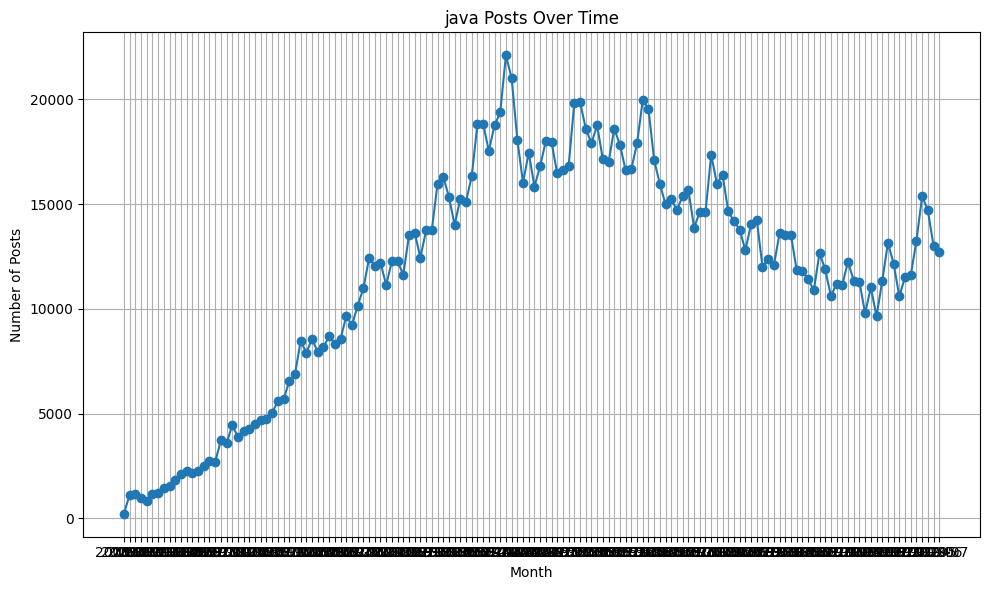

In [58]:
plt.figure(figsize=(10,6))
plt.plot(java_data['Month'],java_data['Number of Posts'],marker='o',linestyle='-') # line plot
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title(f'{language} Posts Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [65]:
java_data

,Date,Programming Language,Number of Posts
Month,,,
2008-08,2008-08-01,java,222
2008-09,2008-09-01,java,1137
2008-10,2008-10-01,java,1153
2008-11,2008-11-01,java,958
2008-12,2008-12-01,java,832
...,...,...,...
2020-03,2020-03-01,java,13253
2020-04,2020-04-01,java,15377
2020-05,2020-05-01,java,14711


In [76]:

rolling_mean = java_data['Number of Posts'].rolling(window=3).mean()
rolling_mean

Month
2008-08             NaN
2008-09             NaN
2008-10      837.333333
2008-11     1082.666667
2008-12      981.000000
               ...     
2020-03    12125.666667
2020-04    13410.666667
2020-05    14447.000000
2020-06    14367.666667
2020-07    13483.000000
Name: Number of Posts, Length: 144, dtype: float64

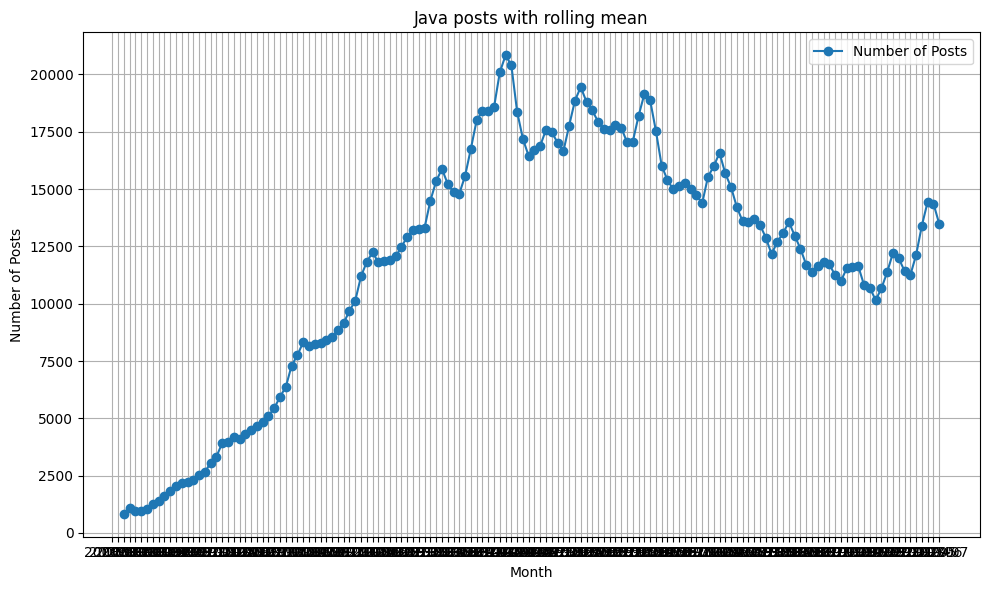

In [77]:
plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.plot(java_data.index, rolling_mean, label="Number of Posts",marker='o',linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Java posts with rolling mean')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()